In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/COPD.csv')

In [3]:
df.head()

,CensusTract,COPD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,1001020200,7.6,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1,1001020400,7.2,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
2,1001021000,9.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
3,1003010905,7.8,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
4,1003010906,9.8,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


In [4]:
df.set_index('CensusTract', inplace=True)
df.head()


,COPD_prevalence,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,,
1001020200,7.6,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000e+00
1001020400,7.2,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000e+00
1001021000,9.2,9.292441,35.908669,0.160869,45.941855,0.733025,4.501463,0.166322,0.024765,0.222258,0.042577,2.861655e-04
1003010905,7.8,8.402913,37.153641,0.233462,35.633327,0.528960,224.749567,0.099045,0.020701,0.528059,0.078937,1.444756e-04
1003010906,9.8,8.414995,36.808459,0.249121,36.136884,0.539997,103.595218,0.063483,0.021972,0.614922,0.063767,1.033556e-07


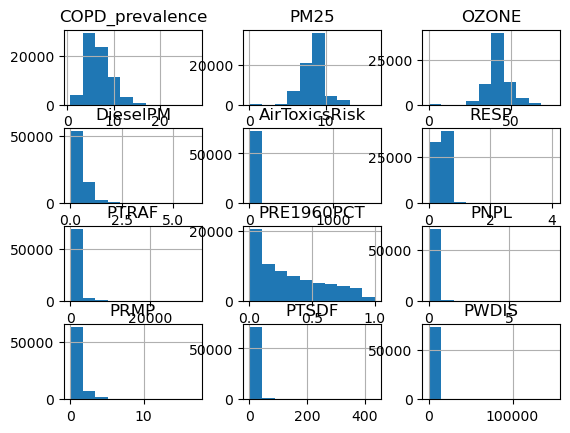

In [5]:
df.hist()
plt.show()

In [6]:
X = df.copy()
X.drop('COPD_prevalence', axis=1, inplace=True)
y = df['COPD_prevalence']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54242, 11) (54242,)
(18081, 11) (18081,)


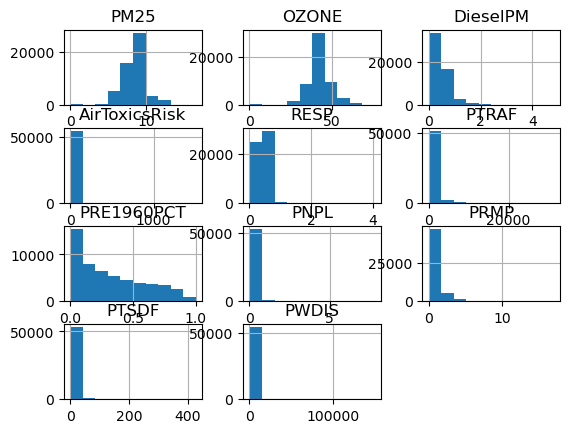

In [9]:
X_train.hist()
plt.show()

In [10]:
X_train.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
19061001102,7.675790,41.308712,0.238955,22.002295,0.270613,206.808298,0.304035,0.268852,1.043339,0.560035,4.805832e-03
27015960600,6.294374,40.220123,0.110106,18.973409,0.227570,69.714908,0.598836,0.013274,0.604208,0.046160,2.206738e-07
36047017100,8.689179,40.157880,2.029418,42.893829,0.744788,3197.930125,0.825212,0.348693,0.280226,107.436218,0.000000e+00
26099224500,9.080132,44.116969,0.451251,28.786964,0.349434,658.197961,0.040913,0.143559,0.111026,0.850032,0.000000e+00
41059950200,9.457754,46.477580,0.083931,21.090690,0.290217,243.038025,0.443595,0.016256,0.077002,0.064230,0.000000e+00


In [12]:
# Saving data without normalization
X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_COPD')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_COPD')
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_COPD')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_COPD')

In [13]:
# Taking the log of the data in X_train that are not close to being normally distributed
X_train_log = X_train.copy()

pt = PowerTransformer()
pt.fit(X_train_log[['DieselPM']])
X_train_log['DieselPM'] = pt.transform(X_train_log[['DieselPM']])

pt1 = PowerTransformer()
pt1.fit(X_train_log[['AirToxicsRisk']])
X_train_log['AirToxicsRisk'] = pt1.transform(X_train_log[['AirToxicsRisk']])

pt2 = PowerTransformer()
pt2.fit(X_train_log[['RESP']])
X_train_log['RESP'] = pt2.transform(X_train_log[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train_log[['PTRAF']])
X_train_log['PTRAF'] = pt3.transform(X_train_log[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train_log[['PRE1960PCT']])
X_train_log['PRE1960PCT'] = pt4.transform(X_train_log[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train_log[['PNPL']])
X_train_log['PNPL'] = pt5.transform(X_train_log[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train_log[['PRMP']])
X_train_log['PRMP'] = pt6.transform(X_train_log[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train_log[['PTSDF']])
X_train_log['PTSDF'] = pt7.transform(X_train_log[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train[['PWDIS']])
X_train['PWDIS'] = pt8.transform(X_train[['PWDIS']])

y_train_log = y_train.copy()
pt9 = PowerTransformer()
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.reshape(-1,1)
pt9.fit(y_train_log)
y_train_log = pt9.transform(y_train_log)
y_train_log = np.ravel(y_train_log)

In [14]:
print(X_train_log.shape, y_train_log.shape)

(54242, 11) (54242,)


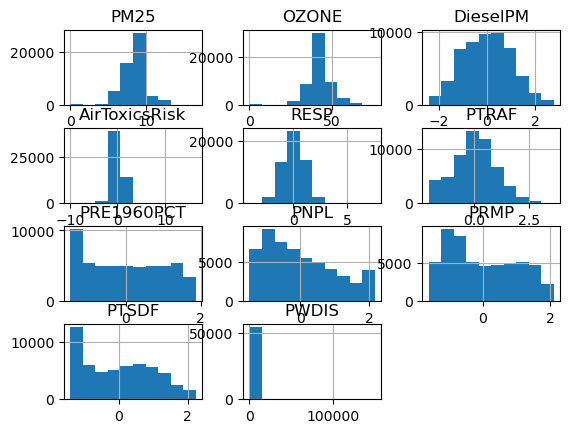

In [15]:
X_train_log.hist()
plt.show()

PWDIS should just be left out of the data since it is not normally distributed

In [16]:
X_test_log = X_test.copy()

In [17]:
X_train_log.drop('PWDIS', axis=1, inplace=True)
X_test_log.drop('PWDIS', axis=1, inplace=True)

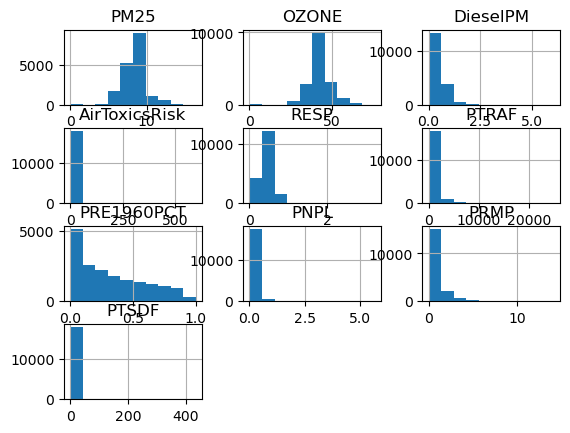

In [18]:
X_test_log.hist()
plt.show()

In [19]:
# Transforming the test data using the PowerTransformer that I fit on the train data
X_test_log['DieselPM'] = pt.transform(X_test_log[['DieselPM']])

X_test_log['AirToxicsRisk'] = pt1.transform(X_test_log[['AirToxicsRisk']])

X_test_log['RESP'] = pt2.transform(X_test_log[['RESP']]) 

X_test_log['PTRAF'] = pt3.transform(X_test_log[['PTRAF']])

X_test_log['PRE1960PCT'] = pt4.transform(X_test_log[['PRE1960PCT']])

X_test_log['PNPL'] = pt5.transform(X_test_log[['PNPL']])

X_test_log['PRMP'] = pt6.transform(X_test_log[['PRMP']])

X_test_log['PTSDF'] = pt7.transform(X_test_log[['PTSDF']])


y_test_log = y_test.copy()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.reshape(-1,1)
y_test_log = pt9.transform(y_test_log)
y_test_log = y_test_log.reshape(18081,)
y_test_log.shape

(18081,)

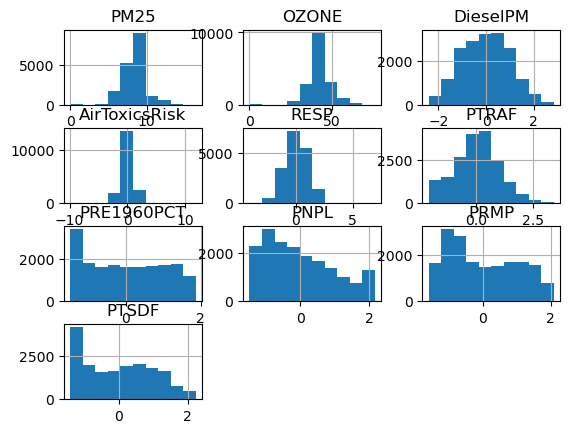

In [20]:
X_test_log.hist()
plt.show()

COPD data should now be ready to model

In [21]:
print(y_train_log.shape, X_train_log.shape, y_test_log.shape, X_test_log.shape)

(54242,) (54242, 10) (18081,) (18081, 10)


In [22]:
X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_COPD')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_COPD')

y_test = pd.Series(y_test)
y_train = pd.Series(y_train)
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_COPD')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_COPD')